In [1]:
import os
import fnmatch
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['hist.bins'] = 100
mpl.rcParams['grid.alpha'] = 0.5

In [3]:
branches_vtx = {
    'vx':    'PrimaryVertices.mPosition.mX1',
    'vy':    'PrimaryVertices.mPosition.mX2',
    'vz':    'PrimaryVertices.mPosition.mX3',
    'mc_id': 'PrimaryVertices.mIdTruth'
}
branches_trk = {
    'ppx': 'PrimaryTracks.mP.mX1',
    'ppy': 'PrimaryTracks.mP.mX2',
    'ppz': 'PrimaryTracks.mP.mX3',
    'fpx': 'PrimaryTracks.mFirstPoint.mX1',
    'fpy': 'PrimaryTracks.mFirstPoint.mX2',
    'fpz': 'PrimaryTracks.mFirstPoint.mX3',
    'lpz': 'PrimaryTracks.mLastPoint.mX3',
    'vi':  'PrimaryTracks.mVertexIndex',
    'gpx': 'GlobalTracks.mP.mX1',
    'gpy': 'GlobalTracks.mP.mX2',
    'gpz': 'GlobalTracks.mP.mX3'
}
branches_vtx_mc = {
    'vx':    'StMuMcVertex.mXyzV.mX1',
    'vy':    'StMuMcVertex.mXyzV.mX2',
    'vz':    'StMuMcVertex.mXyzV.mX3',
    'mc_id': 'StMuMcVertex.mId'
}

In [4]:
#scales = ['s0100', 's0200', 's0300', 's0400', 's0500', 's1000']
scales = ['s0100', 's0250', 's0500', 's1000']

f_name = lambda scale: f'data/install-star-cvs-deb-32-root5-gcc4-ext-vertex-ds-SL18d-{scale}/rcf16000_1_100evts.MuDst.root'
    
rootfiles = [f_name(scale) for scale in scales]
print(len(rootfiles), 'file(s)')
#rootfiles

trees = [uproot.open(rf)['MuDst'] for rf in rootfiles]
#trees

def make_dfs(trees, branches):
    dfs = [tree.pandas.df(branches.values()) for tree in trees]
    for df in dfs: df.columns = branches.keys()
    return dfs

dfs_vtx    = make_dfs(trees, branches_vtx)
dfs_trk    = make_dfs(trees, branches_trk)
dfs_vtx_mc = make_dfs(trees, branches_vtx_mc)

4 file(s)


In [5]:
dfs_vtx_sel = [df.loc[ df.mc_id == 1 ] for df in dfs_vtx]
dfs_vtx_mc_sel = [df.loc[ dfs_vtx_sel[i].index ] for i, df in enumerate(dfs_vtx_mc)]
#dfs_vtx_sel[0]
#dfs_vtx_mc_sel[0]

In [6]:
dfs_vtx_delta = [dfs_vtx_sel[i] - dfs_vtx_mc_sel[i] for i in range(len(dfs_vtx_sel))]
#dfs_vtx_delta[1]

In [59]:
def plot_delta(df):
    fig, (ax, ax_cumul) = plt.subplots(2, figsize=(8, 4*2))

    kwargs = dict( bins=np.linspace(-1, 1, 20), histtype='step' )
    ax.hist(df.vx, **kwargs)
    ax.hist(df.vy, **kwargs)
    ax.hist(df.vz, **kwargs)

    kwargs = dict( bins=np.linspace(0, 1, 20), histtype='step', cumulative=True, density=True )
    ax_cumul.hist(np.abs(df.vx), **kwargs)
    ax_cumul.hist(np.abs(df.vy), **kwargs)
    ax_cumul.hist(np.abs(df.vz), **kwargs)

    plt.grid()
    plt.legend()
    plt.show()


def plot_delta_component(dfs, vc):
    fig, (ax, ax_cumul) = plt.subplots(2, figsize=(8, 4*2))

    kwargs = dict( bins=np.linspace(-1, 1, 21), histtype='step' )
    for scale, df in list(zip(scales, dfs)):
        ax.hist(df[vc], label=scale, **kwargs)

    ax.grid()
    ax.legend()
    
    kwargs = dict( bins=np.linspace(0, 1, 21), histtype='step', cumulative=True, density=True )
    for scale, df in list(zip(scales, dfs)):
        ax_cumul.hist(np.abs(df[vc]), label=scale, **kwargs)
 
    ax_cumul.set_ylim(0.3, 1.02)
    ax_cumul.grid()
    ax_cumul.legend()
 
    plt.show()

## s = 100, 250, 500, 1000

### Change in vertex X position 

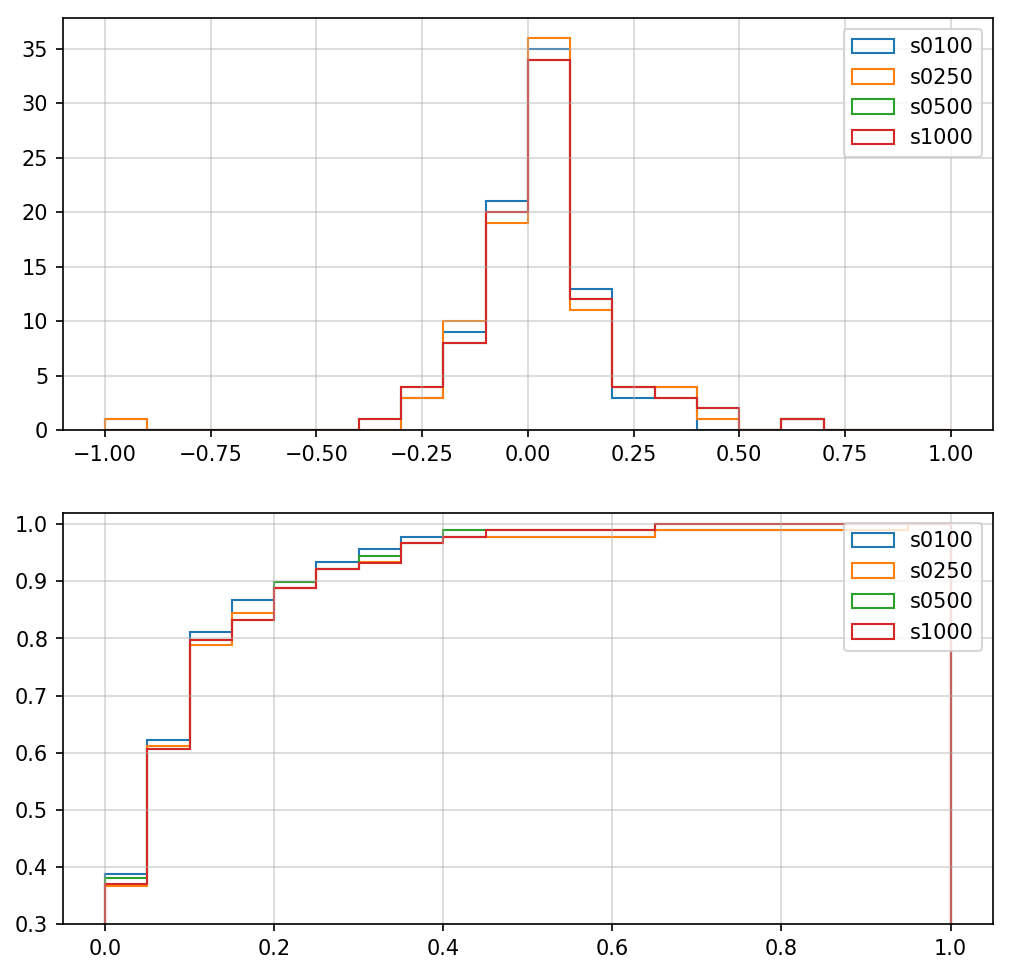

In [60]:
plot_delta_component(dfs_vtx_delta, 'vx')

### Change in vertex Y position 

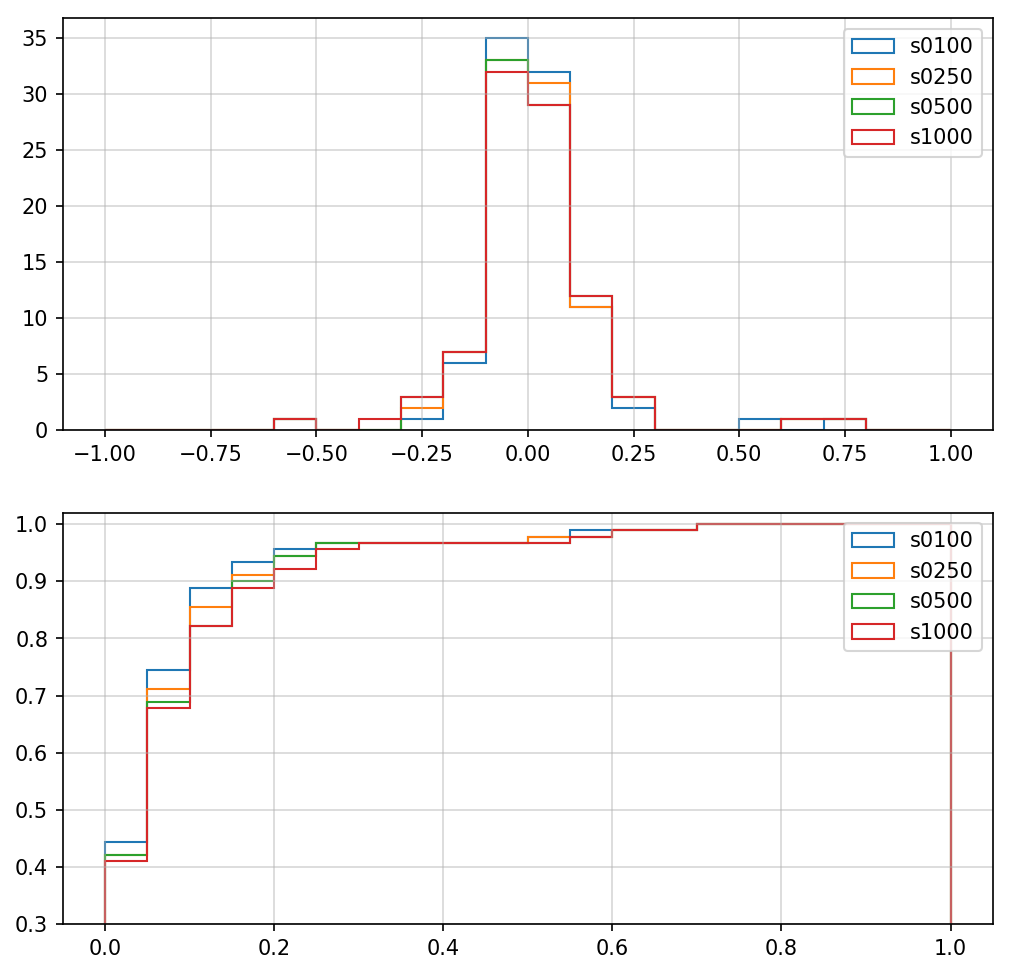

In [61]:
plot_delta_component(dfs_vtx_delta, 'vy')

### Change in vertex Z position 

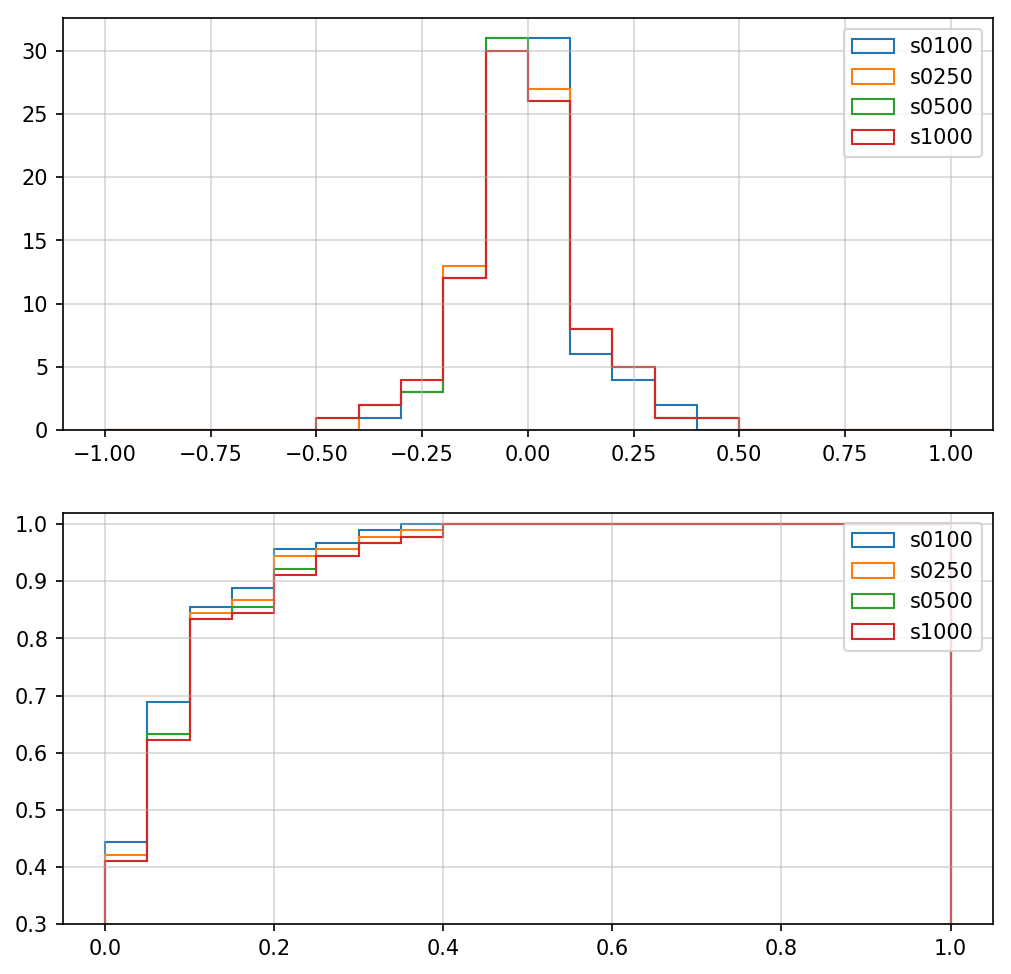

In [62]:
plot_delta_component(dfs_vtx_delta, 'vz')

## Change in vertex X, Y, and Z positions. s = 100

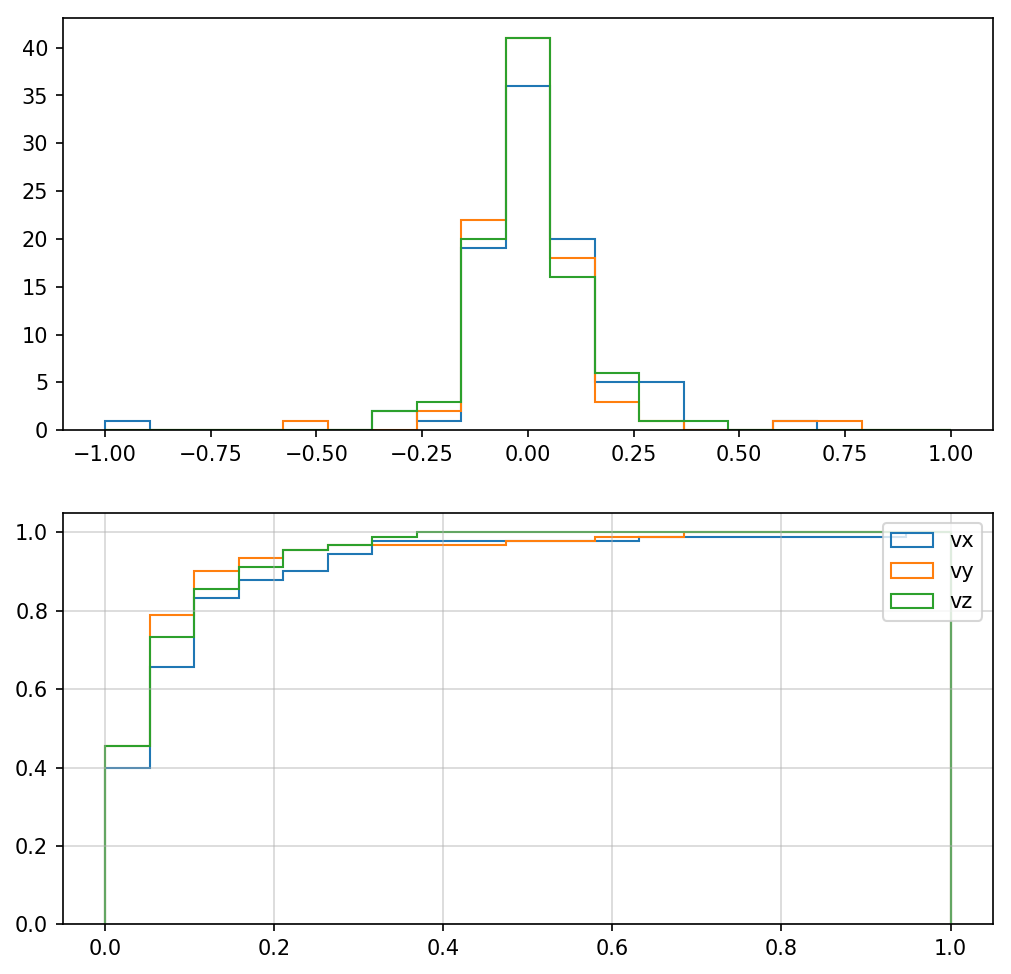

In [63]:
plot_delta(dfs_vtx_delta[0])